# Sai Jyothi Talakondapati

## Data Science Internship Level-2 

# Cognifyz Technologies

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\talak\Downloads\Dataset .csv")

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Task1

## Table Booking and online delivery 

* Determine the percentage of restaurants that offer table booking and online delivery.
* Compare the average ratings of restaurants with table booking and those without.
* Analyze the availability of online delivery among restaurants with different price ranges.

In [5]:
# percentage of restaurants that offer table booking
table_percentage = len(data[data['Has Table booking']=='Yes'])/len(data)*100
print(f'Percentage of restaurants that offer table booking: {table_percentage:.2f}%')

Percentage of restaurants that offer table booking: 12.12%


In [6]:
# percentage of restaurants that offer onlin delivery
online_percentage = len(data[data['Has Online delivery']=='Yes'])/len(data)*100
print(f' Percentage of restaurants that offer Online delivery: {online_percentage:.2f}%')

 Percentage of restaurants that offer Online delivery: 25.66%


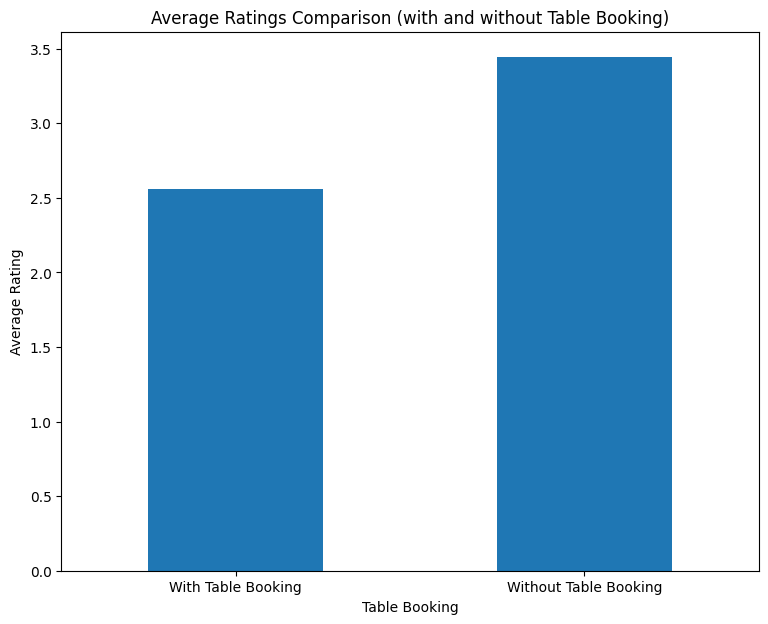

In [7]:
average_ratings = data.groupby('Has Table booking')['Aggregate rating'].mean()

# Plot the comparison
plt.figure(figsize=(9, 7))
average_ratings.plot(kind='bar')
plt.title('Average Ratings Comparison (with and without Table Booking)')
plt.xlabel('Table Booking')
plt.ylabel('Average Rating')
plt.xticks([0, 1], ['With Table Booking', 'Without Table Booking'], rotation=0)
plt.show()

<Figure size 1700x800 with 0 Axes>

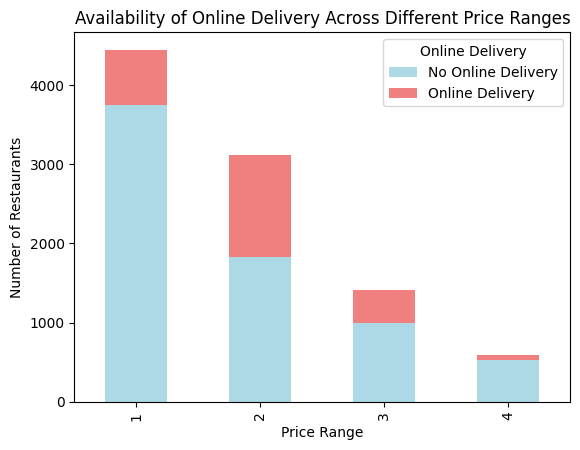

In [8]:
# availability of online delivery among restaurants with different price ranges.
delivery_cross_tab = pd.crosstab(data['Price range'], data['Has Online delivery'])

# Plot the comparison
plt.figure(figsize=(17, 8))
delivery_cross_tab.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Availability of Online Delivery Across Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.legend(title='Online Delivery', labels=['No Online Delivery', 'Online Delivery'])
plt.show()

# Task2

## Price Range Analysis 

* Determine the most common price range among all the restaurants.
* Calculate the average rating for each price range.
* Identify the color that represents the highest average rating among different price ranges.

In [9]:
most_common_price_range = data['Price range'].mode()
print('The most common price range among all the restaurants is ', most_common_price_range[0])

The most common price range among all the restaurants is  1


In [10]:
average_ratings= data.groupby('Price range')['Aggregate rating'].mean().reset_index()
print("average rating for each price range: ")
print(average_ratings)

average rating for each price range: 
   Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918


In [11]:
max_rating= average_ratings['Aggregate rating'].max()
color_highest= average_ratings.loc[average_ratings['Aggregate rating']==max_rating,'Price range'].values[0]
print(f"The color representing the highest average rating is {color_highest}")

The color representing the highest average rating is 4


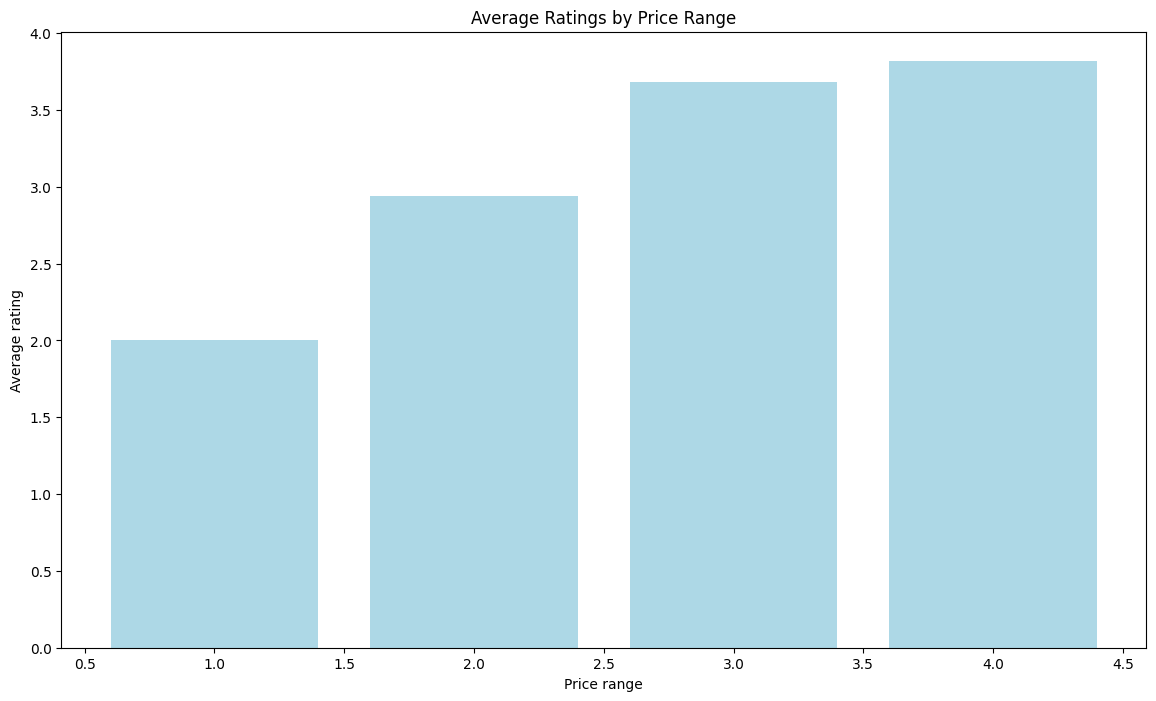

In [12]:
plt.figure(figsize=(14,8))
plt.bar(average_ratings['Price range'], average_ratings['Aggregate rating'], color='lightblue')
plt.xlabel('Price range')
plt.ylabel('Average rating')
plt.title('Average Ratings by Price Range')
plt.show()

In [13]:
highest_average_rating = data.groupby('Price range')['Aggregate rating'].mean().idxmax()
print(f'The color that represents the highest average rating among different price ranges is {highest_average_rating}')

The color that represents the highest average rating among different price ranges is 4


# Task3

# Feature Engineering

* Extract additional features from the existing columns, such as the length of the restaurant name or address.
* Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [14]:
# Extract additional features from the existing columns, such as the length of the restaurant name or address.
data['Restaurant name length'] = data['Restaurant Name'].apply(len)
data['Address length'] = data['Address'].apply(len)
data[['Restaurant Name','Address','Restaurant name length','Address length']]

,Restaurant Name,Address,Restaurant name length,Address length
0,Le Petit Souffle,"Third Floor, Century City Mall, Kalayaan Avenu...",16,71
1,Izakaya Kikufuji,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",16,67
2,Heat - Edsa Shangri-La,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",22,56
3,Ooma,"Third Floor, Mega Fashion Hall, SM Megamall, O...",4,70
4,Sambo Kojin,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",11,64
...,...,...,...,...
9546,Naml۱ Gurme,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",11,103
9547,Ceviz A��ac۱,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",12,77
9548,Huqqa,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",5,73
9549,A���k Kahve,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",11,75
